In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import pandas as pd

import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import pickle
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

#from matplotlib import reload
import arrow
import gsw
import time

%matplotlib inline

plt.rcParams.update({'font.size': 20,
                     'xtick.labelsize' : 20,
                     'ytick.labelsize' : 20})



In [11]:
# open files

surf_test = nc.Dataset('./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_y2017m12d31_DIC_PacellaSurf.nc')
deep_test = nc.Dataset('./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_y2017m12d31_DIC_nosurfnodeep.nc')
old_test = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2017m12d31.nc')
depths = (old_test['deptht'][:])
surface_int = (surf_test['preindustrial_DIC']['DIC_intrusion'][:])
cstar_int = (deep_test['preindustrial_DIC']['final_target_DIC'][:]-old_test['DIC'][0,:,0,:])
cstar_int[cstar_int > 1000] = np.nan


In [18]:
def toy_interpolator(surf_int, cstar_int,depths):
    
    #where is cstar_int
    cstar = (np.where(~np.isnan(cstar_int)))
    where_cstar_starts = cstar[0][0]
    
    # depth what part of the way are we to the place where we switch methods
    depth_way = depths/depths[where_cstar_starts]
    
    #
    diff = surf_int - cstar_int[where_cstar_starts]

    surf_intr = np.zeros_like(other_int)
    surf_intr = surf_int - (depth_way) * (diff)
    surf_intr[where_cstar_starts:40] = np.nan

    
    stitched_intr = np.zeros_like(surf_intr)
    stitched_intr[0:where_cstar_starts] = surf_intr[0:where_cstar_starts]
    stitched_intr[where_cstar_starts:40] = cstar_int[where_cstar_starts:40]
    last_notnan = np.max(np.where(~np.isnan(stitched_intr)))
    last_notnan
    stitched_intr[last_notnan:40] = stitched_intr[last_notnan]
    
    return stitched_intr
    
    #print(surf_intr)
#     #print(surf_intr[22])

#     newPI_DIC_surfadj_tp = np.copy(newPI_DIC_tp)
#     #print(loc_min_over25[0][0])
#     newPI_DIC_surfadj_tp[0:loc_min_over25[0][0]] = \
#     presday_DIC_tp[0:loc_min_over25[0][0]]-surf_intr[0:loc_min_over25[0][0]]
    
    return #newPI_DIC_surfadj_tp

toy_interpolator(30,other_int[:,400], depths)

masked_array(data=[29.945789335289266, 29.837367753631035,
                   29.728945577012446, 29.620522241570065,
                   29.512096649049944, 29.403666660353498,
                   29.295228109115662, 29.186772880479708,
                   29.07828516929655, 28.96973419298413,
                   28.861060001498988, 28.752145851766652,
                   28.642764449074193, 28.53247342399679,
                   28.42041244742802, 28.304910703262678,
                   28.182732286199176, 28.047643596934034,
                   27.887760107640922, 27.68087133937535,
                   27.387019558894032, 26.939276740410715,
                   26.23932605804107, 25.173331719340336,
                   23.659054249128637, 21.696493647405987,
                   24.502084841378746, 26.886215483394608,
                   27.583728786189567, 26.06290972494935,
                   23.8373430762731, 23.129939271075727,
                   22.976818947609445, 22.277625811474536,
      

In [6]:
start ='2017-01-01'
end ='2017-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

In [52]:
intrusion_interpolated = np.zeros([365,40,950])
cstar_ar = np.zeros([365,40,950])

In [44]:
for i in range(0,365):
    
    if i%10 == 0:
        print(i)
    tdate = arrow_array[i][0]
    #take a boundary condition string from liveocean, open it
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'

    tstr = f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}.nc'
    
    surf_test = nc.Dataset(f'./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_{ymd}_DIC_PacellaSurf.nc')
    deep_test = nc.Dataset(f'./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_{ymd}_DIC_nosurfnodeep.nc')
    old_test = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}.nc')
    depths = (old_test['deptht'][:])
    surface_int = (surf_test['preindustrial_DIC']['DIC_intrusion'][:])
    #print(surface_int[:,400])
    cstar_int = (deep_test['preindustrial_DIC']['final_target_DIC'][:]-old_test['DIC'][0,:,0,:])
    cstar_int[cstar_int > 1000] = np.nan
    #print(cstar_int[:,400])
    #w = nc.Dataset(tstr)
    
    for j in range(0,950):
        surf_prof =  surface_int[0,j]
        cstar_prof = cstar_int[:,j]
        #print(cstar_prof)
        intr_prof = toy_interpolator(surf_prof,cstar_prof, depths)
        intrusion_interpolated[i,:,j] = intr_prof

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


In [53]:
for i in range(0,365):
    
    if i%10 == 0:
        print(i)
    tdate = arrow_array[i][0]
    #take a boundary condition string from liveocean, open it
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'

    tstr = f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}.nc'
    
    surf_test = nc.Dataset(f'./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_{ymd}_DIC_PacellaSurf.nc')
    deep_test = nc.Dataset(f'./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_{ymd}_DIC_nosurfnodeep.nc')
    old_test = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}.nc')
    depths = (old_test['deptht'][:])
    surface_int = (surf_test['preindustrial_DIC']['DIC_intrusion'][:])
    #print(surface_int[:,400])
    cstar_int = (deep_test['preindustrial_DIC']['final_target_DIC'][:]-old_test['DIC'][0,:,0,:])
    cstar_int[cstar_int > 1000] = np.nan
    cstar_ar[i,:,:] = cstar_int
#     #print(cstar_int[:,400])
#     #w = nc.Dataset(tstr)
    
#     for j in range(0,950):
#         surf_prof =  surface_int[0,j]
#         cstar_prof = cstar_int[:,j]
#         #print(cstar_prof)
#         intr_prof = toy_interpolator(surf_prof,cstar_prof, depths)
#         intrusion_interpolated[i,:,j] = intr_prof

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


In [54]:
pickle.dump(cstar_ar, open("cstar_ar.pkl", 'wb'))

In [46]:
pickle.dump(intrusion_interpolated, open("intrusion_interpolated.pkl", 'wb'))

np.shape(intrusion_interpolated)
profs_interpolated = np.mean(intrusion_interpolated,axis = 2)
print(np.shape(profs_interpolated))
print(profs_interpolated[0,:])
print(profs_interpolated[200,:])

(365, 40)
[31.89812058 31.78791783 31.67771448 31.56750995 31.45730313 31.34709184
 31.23687185 31.1266349  31.01636494 30.90603068 30.79557117 30.68486777
 30.57368943 30.46158653 30.3476846  30.23028538 30.1060998  29.96879186
 29.80628178 29.59599422 29.297315   28.84221661 28.13076705 27.04726042
 25.5081062  25.42633666 26.5923485  27.55965775 27.42357094 26.57406475
 25.01569208 23.44273651 22.94946241 22.53919931 21.44707058 21.44707058
 21.44707058 21.44707058 21.44707058 21.44707058]
[33.61705962 33.17307228 32.72908249 32.28508796 31.84108419 31.39706241
 30.95300558 30.50888044 30.06462229 29.62010507 29.17508329 28.72907887
 28.28116104 27.82951831 27.3706276  26.89764693 26.42586446 26.07887676
 25.94721909 25.83827579 25.7342049  25.59301825 25.35640169 25.14420084
 27.48950921 25.63520227 21.83459859 19.63679512 17.11741062 15.50601165
 13.59368178 11.73996474 10.08642128  8.83362766  8.09798643  8.09798643
  8.09798643  8.09798643  8.09798643  8.09798643]


In [56]:
intrusion_interpolated = pickle.load(open('./intrusion_interpolated.pkl', 'rb'))  
print(np.shape(intrusion_interpolated))
#pickle.dump(cstar_ar, open("cstar_ar.pkl", 'wb'))
cstar_ar_flat = np.mean(cstar_ar,axis = 2)
cstar_monthly = np.zeros([12,40])
profs_interpolated_monthly = np.zeros([12,40])
for i in range(0,12):
    
    profs_interpolated_monthly[i,:] = \
        np.nanmean(profs_interpolated[(i*30):((i+1)*30),:], axis = 0)
    cstar_monthly[i,:] = \
        np.nanmean(cstar_ar_flat[(i*30):((i+1)*30),:], axis = 0)


(365, 40, 950)


<ipython-input-56-a3bb58958181>:12: RuntimeWarning: Mean of empty slice
  np.nanmean(cstar_ar_flat[(i*30):((i+1)*30),:], axis = 0)


No handles with labels found to put in legend.


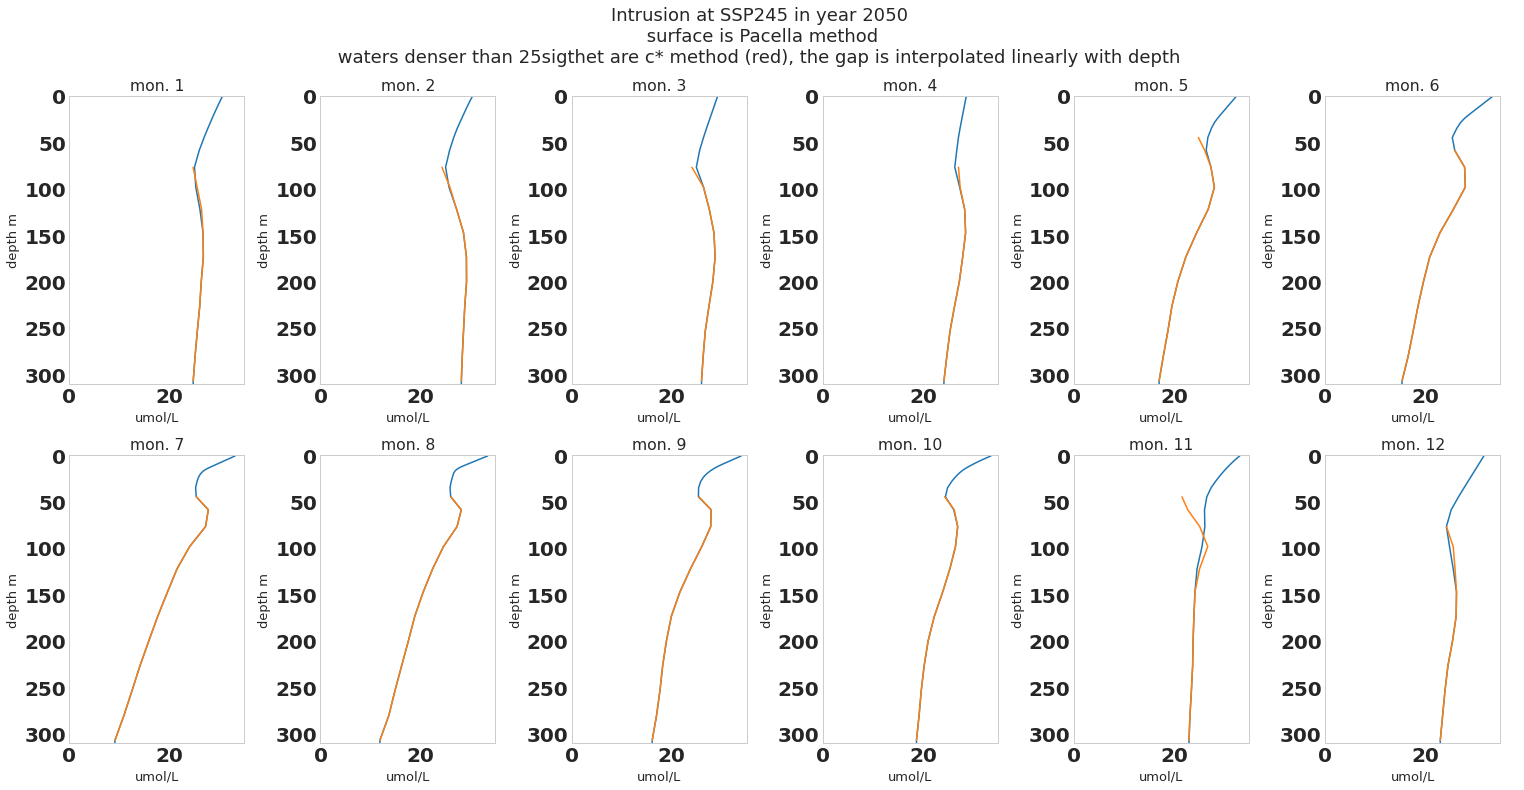

In [58]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}

plt.rc('font', **font)


w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]

fact = 0.8
fig, axs = plt.subplots(2,6, figsize=(26.7*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)

axs = axs.ravel()

for i in range(0,12):

    axs[i].plot(profs_interpolated_monthly[i,:],depths)
    axs[i].plot(cstar_monthly[i,:],depths)
   # plt.xticks(rotation=70) 
for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].set_xlim([0,35])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].set_ylabel('depth m')
    axs[i].set_xlabel('umol/L')

    
axs[5].legend(bbox_to_anchor = [1, 1])    
plt.suptitle('Intrusion at SSP245 in year 2050 \n surface is Pacella method \n waters denser than 25sigthet are c* method (red), the gap is interpolated linearly with depth  ', fontsize = 18)
plt.tight_layout()

In [36]:
print(np.shape(profs_interpolated_monthly[i,:]))

(40,)
